<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_8_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317742,66.951466,52.921312,-45562.081813,-45366.891293,8475.425589,-53842.316882
1,0.0,1.0,77.715465,86.779054,99.959667,156920.681633,157195.135819,698.621406,156496.514413
2,0.0,2.0,54.909648,73.486571,90.235502,83603.122777,83831.754499,170.832912,83660.921587
3,0.0,3.0,47.630837,76.411548,93.288743,255713.869175,255941.200303,736.049805,255205.150498
4,0.0,4.0,50.098292,33.379297,87.120073,-19832.111577,-19651.513915,-13128.196275,-6523.317641
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.688390,65.332359,64.907663,-29176.280870,-28975.352457,4462.598667,-33437.951124
249996,999.0,246.0,96.381393,73.260132,78.043412,211741.385594,211999.070532,28752.519847,183246.550685
249997,999.0,247.0,30.112969,52.241634,95.392373,-50006.526389,-49818.779414,-12624.699674,-37194.079740
249998,999.0,248.0,95.133189,95.685906,80.644005,466474.690358,466756.153458,29795.490484,436960.662975


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317742,66.951466,52.921312,-45562.081813,-45366.891293,8475.425589,-53842.316882
1,0.0,1.0,77.715465,86.779054,99.959667,156920.681633,157195.135819,698.621406,156496.514413
2,0.0,2.0,54.909648,73.486571,90.235502,83603.122777,83831.754499,170.832912,83660.921587
3,0.0,3.0,47.630837,76.411548,93.288743,255713.869175,255941.200303,736.049805,255205.150498
4,0.0,4.0,50.098292,33.379297,87.120073,-19832.111577,-19651.513915,-13128.196275,-6523.317641
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.688390,65.332359,64.907663,-29176.280870,-28975.352457,4462.598667,-33437.951124
249996,999.0,246.0,96.381393,73.260132,78.043412,211741.385594,211999.070532,28752.519847,183246.550685
249997,999.0,247.0,30.112969,52.241634,95.392373,-50006.526389,-49818.779414,-12624.699674,-37194.079740
249998,999.0,248.0,95.133189,95.685906,80.644005,466474.690358,466756.153458,29795.490484,436960.662975


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    65.317742  66.951466  ...   8475.425589  -53842.316882
      1.0    77.715465  86.779054  ...    698.621406  156496.514413
      2.0    54.909648  73.486571  ...    170.832912   83660.921587
      3.0    47.630837  76.411548  ...    736.049805  255205.150498
      4.0    50.098292  33.379297  ... -13128.196275   -6523.317641
...                ...        ...  ...           ...            ...
999.0 245.0  60.688390  65.332359  ...   4462.598667  -33437.951124
      246.0  96.381393  73.260132  ...  28752.519847  183246.550685
      247.0  30.112969  52.241634  ... -12624.699674  -37194.079740
      248.0  95.133189  95.685906  ...  29795.490484  436960.662975
      249.0  96.952586  66.222912  ...  30555.761226  300750.600145

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    65.317742  66.951466  ...   8475.425589  -53842.316882
      1.0    77.715465  86.779054  ...    698.621406  156496.514413
      2.0    54.909648  73.486571  ...    170.832912   83660.921587
      3.0    47.630837  76.411548  ...    736.049805  255205.150498
      4.0    50.098292  33.379297  ... -13128.196275   -6523.317641
...                ...        ...  ...           ...            ...
999.0 245.0  60.688390  65.332359  ...   4462.598667  -33437.951124
      246.0  96.381393  73.260132  ...  28752.519847  183246.550685
      247.0  30.112969  52.241634  ... -12624.699674  -37194.079740
      248.0  95.133189  95.685906  ...  29795.490484  436960.662975
      249.0  96.952586  66.222912  ...  30555.761226  300750.600145

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,65.317742,66.951466,52.921312,-45562.081813,-45366.891293,8475.425589,-53842.316882
1,0.0,1.0,77.715465,86.779054,99.959667,156920.681633,157195.135819,698.621406,156496.514413
2,0.0,2.0,54.909648,73.486571,90.235502,83603.122777,83831.754499,170.832912,83660.921587
3,0.0,3.0,47.630837,76.411548,93.288743,255713.869175,255941.200303,736.049805,255205.150498
4,0.0,4.0,50.098292,33.379297,87.120073,-19832.111577,-19651.513915,-13128.196275,-6523.317641
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,60.688390,65.332359,64.907663,-29176.280870,-28975.352457,4462.598667,-33437.951124
249996,999.0,246.0,96.381393,73.260132,78.043412,211741.385594,211999.070532,28752.519847,183246.550685
249997,999.0,247.0,30.112969,52.241634,95.392373,-50006.526389,-49818.779414,-12624.699674,-37194.079740
249998,999.0,248.0,95.133189,95.685906,80.644005,466474.690358,466756.153458,29795.490484,436960.662975


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat          e_hat
rep   index                        ...                             
0.0   0.0    65.317742  66.951466  ...   8475.425589  -53842.316882
      1.0    77.715465  86.779054  ...    698.621406  156496.514413
      2.0    54.909648  73.486571  ...    170.832912   83660.921587
      3.0    47.630837  76.411548  ...    736.049805  255205.150498
      4.0    50.098292  33.379297  ... -13128.196275   -6523.317641
...                ...        ...  ...           ...            ...
999.0 245.0  60.688390  65.332359  ...   4462.598667  -33437.951124
      246.0  96.381393  73.260132  ...  28752.519847  183246.550685
      247.0  30.112969  52.241634  ... -12624.699674  -37194.079740
      248.0  95.133189  95.685906  ...  29795.490484  436960.662975
      249.0  96.952586  66.222912  ...  30555.761226  300750.600145

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

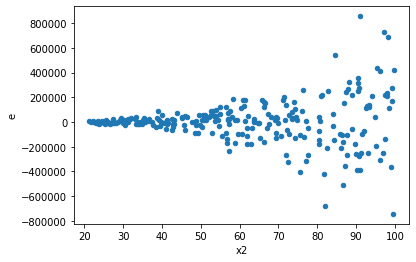

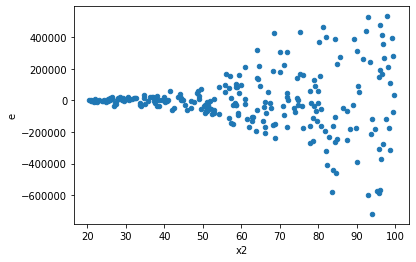

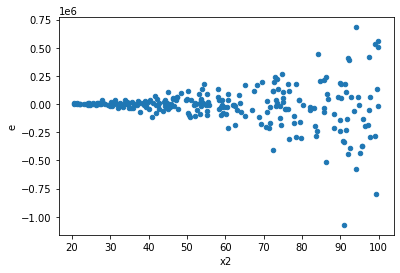

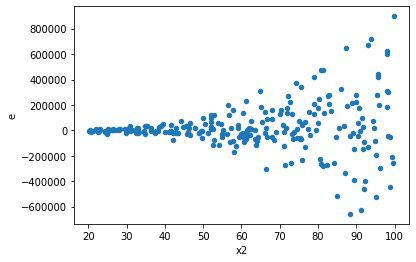

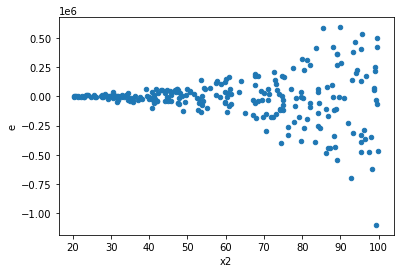

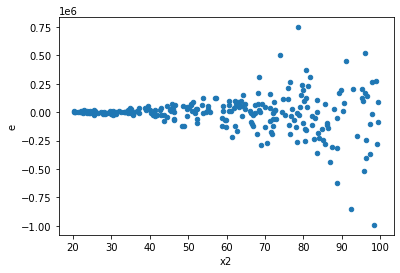

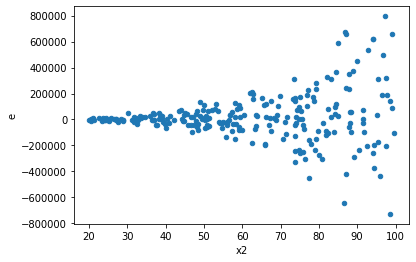

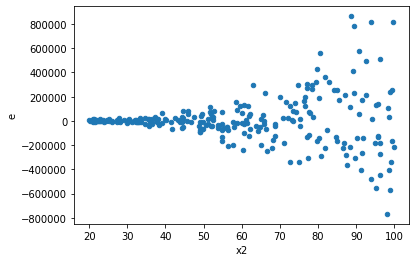

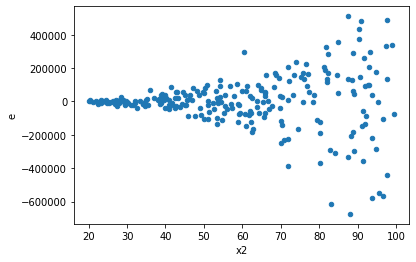

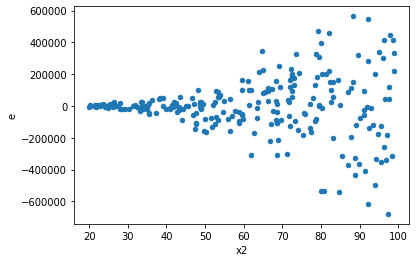

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,7170322875577.098,112128158537.20483,74690863287.26143,1168001651.429217,63.94756650888848,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,7711821063488.484,76682452908.86516,80331469411.33838,798775551.1340121,100.56826263309232,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,7324414440646.787,114690519337.30261,76295983756.73737,1194692909.7635689,63.862422831182975,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,8227600254706.042,129722976068.84717,85704169319.8546,1351281000.717158,63.42438713662761,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,8787889072244.258,114935725733.0095,91540511169.21101,1197247143.0521824,76.45916024977409,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,6255035867525.018,104489048862.07971,65156623620.05227,1088427592.3133304,59.86307594570365,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,7808419060689.47,146789580694.50412,81337698548.84865,1529058132.234418,53.19464108927604,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,9045068341340.441,83563462514.96945,94219461888.96294,870452734.5309318,108.2419046448694,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5919504410334.35,106122869778.13861,61661504274.31614,1105446560.1889439,55.77972422635872,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,7170322875577.098,112128158537.20483,74690863287.26143,1168001651.429217,63.94756650888848,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,7711821063488.484,76682452908.86516,80331469411.33838,798775551.1340121,100.56826263309232,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,7324414440646.787,114690519337.30261,76295983756.73737,1194692909.7635689,63.862422831182975,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,8227600254706.042,129722976068.84717,85704169319.8546,1351281000.717158,63.42438713662761,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,8787889072244.258,114935725733.0095,91540511169.21101,1197247143.0521824,76.45916024977409,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,6255035867525.018,104489048862.07971,65156623620.05227,1088427592.3133304,59.86307594570365,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,7808419060689.47,146789580694.50412,81337698548.84865,1529058132.234418,53.19464108927604,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,9045068341340.441,83563462514.96945,94219461888.96294,870452734.5309318,108.2419046448694,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,5919504410334.35,106122869778.13861,61661504274.31614,1105446560.1889439,55.77972422635872,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64